<a href="https://colab.research.google.com/github/DavidStrickland19/Developing-an-open-source-Library-Numerical-Analysis-/blob/main/Boston_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
plt.show()
import pathlib
from pathlib import Path
import scipy

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [3]:
df2 = pd.read_csv('Boston.csv')

In [4]:
Rows = pd.options.display.max_rows = 20
#Includung all 25 columns
Columns = pd.options.display.max_columns = 25

In [5]:
#First Giving back the dimension of our table 
df2.shape
#Printing our table
print(df2.shape)

(26598, 25)


In [6]:
#Show the table
print(df2)

       Unnamed: 0    Bib                   Name  Age M/F           City State  \
0               0      3         Desisa, Lelisa   25   M           Ambo   NaN   
1               1      4  Tsegay, Yemane Adhane   30   M    Addis Ababa   NaN   
2               2      8         Chebet, Wilson   29   M       Marakwet   NaN   
3               3     11       Kipyego, Bernard   28   M        Eldoret   NaN   
4               4     10          Korir, Wesley   32   M         Kitale   NaN   
...           ...    ...                    ...  ...  ..            ...   ...   
26593       26593  25656  Prescott, Francine J.   64   F  Boynton Beach    FL   
26594       26594  31359    Emerson, Annette C.   61   F       Old Town    ME   
26595       26595  25559          Cerveny, Nona   66   F     Scottsdale    AZ   
26596       26596  29396    Buccilli, Alfred P.   53   M      Lynnfield    MA   
26597       26597  25651        Reilly, William   62   M     Kew Garden    NY   

      Country Citizen Unnam

In [7]:
#List out all of the Column Names
print(df2.columns)


Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')


In [8]:
df2.head(20)


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
5,5,9,"Chepkwony, Frankline",30,M,Koibatek,NaN,KEN,NaN,NaN,0:14:44,0:29:45,0:44:59,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:18,0:05:00,-,2:10:52,6,6,6
6,6,14,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,NaN,NaN,0:14:45,0:29:45,0:45:20,1:00:43,1:04:03,1:16:05,1:31:59,1:48:06,2:04:05,0:05:01,-,2:11:20,7,7,7
7,7,1,"Keflezighi, Meb",39,M,San Diego,CA,USA,NaN,NaN,0:14:44,0:29:44,0:44:59,1:00:30,1:04:02,1:16:07,1:31:59,1:47:59,2:04:58,0:05:04,-,2:12:42,8,8,8
8,8,5,"Tola, Tadese",27,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:02,1:16:07,1:32:00,1:48:00,2:04:39,0:05:06,-,2:13:35,9,9,9
9,9,16,"Shafar, Vitaliy",33,M,Lutsk,NaN,UKR,NaN,NaN,0:15:14,0:30:34,0:46:05,1:01:43,1:05:07,1:17:18,1:33:11,1:49:43,2:06:16,0:05:07,-,2:13:52,10,10,10


In [9]:
#class convertsecs:




def get_sec(time_str):
        """Get Seconds from time."""
        
      
        if time_str.count(':') == 2 :

          h, m, s = time_str.split(':')
          return int(h) * 3600 + int(m) * 60 + int(s)

        else :
            
            return "NA"
          






def newseconds(column, column2):
    for ht in df2.index:
        df2[column][ht]  = get_sec(df2[column2][ht])





#create new colmn in DF. This new column will be empty, hence the NaT method
df2['Halfsec'] = pd.NaT
df2['Off_Time_sec'] = pd.NaT


#create an instance of the convertsecs() class
#s = convertsecs()



#call the newseconds functoin and pass through "halfsec" which will replace the "column"
newseconds('Halfsec', 'Half')
newseconds ('Off_Time_sec', 'Official Time')




  #df2['HalfSecs'][ht] = get_sec(df2['Half'][ht])
  #HalfSec = get_sec(df2['Half'][ht])
  #insert get_sec(df2['Half'][ht])  to put our converted seconds back in to the data set


 





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
clean_data = df2[(df2['Halfsec'] != "NA") & (df2['Off_Time_sec'] != "NA")]

In [ ]:
#clean_data[(np.abs(stats.zscore(clean_data[['Halfsec']])) < 3)]

In [11]:
print(clean_data.shape)
print(df2.shape)

(26569, 27)
(26598, 27)


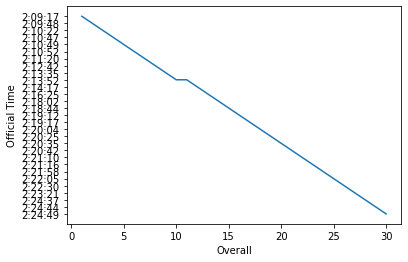

In [14]:
sns.lineplot(data = clean_data.head(30), x='Overall',y = 'Official Time')


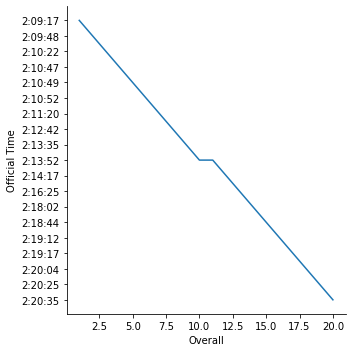

In [15]:
sns.relplot(data = df2.head(20), x ='Overall',y = 'Official Time', kind = 'line')

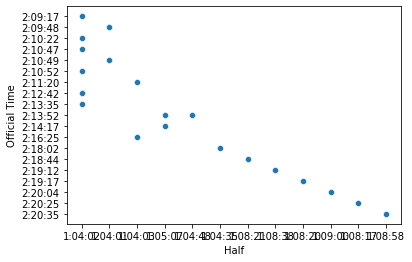

In [16]:
sns.scatterplot(data = df2.head(20), x='Half',y = 'Official Time')

In [20]:
first_20_rows = clean_data.loc[:100, ['Halfsec', 'Off_Time_sec']]

In [ ]:
#Failed attempt to Remove outliers
from scipy import stats
z_scores = stats. zscore(first_20_rows[['Halfsec']]) 
abs_z_scores = np. abs(z_scores)
filtered_entries = (abs_z_scores < 3). all(axis=1)
new_df = first_20_rows[filtered_entries]
print(new_df)

In [41]:
#Here we are splitting our dataframes ('Half' and 'Official') into train and test sets. 80/20, train/test respecitvely
# random_state is set to 42 to shuffle our set a controlled number of times to prevent bias in our split 
x_train, x_test, y_train, y_test = train_test_split(df_filtered[['Halfsec']], df_filtered[['Off_Time_sec']], test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [42]:
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (77, 1)
Test - Predictors shape (20, 1)
Train - Target shape (77, 1)
Test - Target shape (20, 1)


In [43]:
#Begin making our linear regression model using training sets
cls = linear_model.LinearRegression()

cls.fit((x_train),(y_train)) 


LinearRegression()

In [44]:
#Make prediction using Linear Regression model. Compare to test set
prediction = cls.predict(x_test)

In [45]:
#Collect our statistical summary
cls.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [46]:
print('Co-efficient of linear regression', cls.coef_)

Co-efficient of linear regression [[1.67816988]]


In [47]:
print('Intercept of linear regression', cls.intercept_)

Intercept of linear regression [1574.644623]


In [48]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction ))

Mean Square Error 19789.815374987626


In [49]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.8575258428053155


Text(0.5, 1.0, 'Linear Regression')

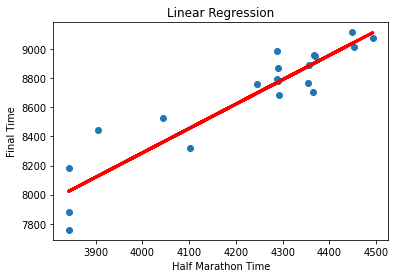

In [50]:
#graphing Linear Regression model against our TEST SET
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color = 'red', linewidth = 3)
plt.xlabel('Half Marathon Time')
plt.ylabel('Final Time')
plt.title('Linear Regression')

The linear regression seems to have an okay fit for our data. There are clear outliers and it is clear that there could be a better fit. We will look at our residual plot next to see how well our linear regression model represented our data with it's predictions.

Text(0, 0.5, 'Residual')

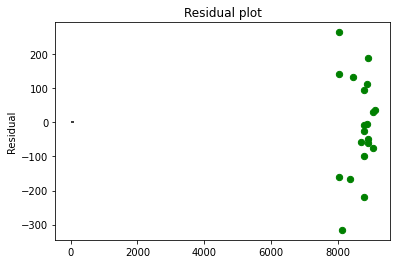

In [52]:
#Residual Plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

We can see that our residual plot does not have a random pattern, because we clearly see a bundled group of points in the far right of the plot. This tells us that our linear regression does not have a good fit of the data. We either need to clean our data more and take away outliers, or try a different model.

In [35]:
#View the actual residual points
resid = cls.predict(x_test) - y_test
print(resid)

   Off_Time_sec
84     -72.3228
55       15.761
66      3.18392
67      150.861
45      10.8168
..          ...
93     -204.225
78       137.51
12     -166.091
31      209.522
76     -390.622

[21 rows x 1 columns]


Here we will attempt at identifying and deleting outliers.

In [36]:
from scipy import stats

In [37]:
q = first_20_rows['Halfsec'].quantile(0.99)

In [38]:
first_20_rows[first_20_rows['Halfsec'] < q]

,Halfsec,Off_Time_sec
0,3842,7757
1,3841,7788
2,3842,7822
3,3842,7847
4,3841,7849
...,...,...
94,4492,9098
95,4449,9117
97,4511,9121
98,4446,9122


In [39]:
q_low = first_20_rows['Halfsec'].quantile(0.01)
q_hi  = first_20_rows['Halfsec'].quantile(0.99)

df_filtered = first_20_rows[(first_20_rows['Halfsec'] < q_hi) & (first_20_rows['Halfsec'] > q_low)]

In [40]:
print(df_filtered)

    Halfsec Off_Time_sec
0      3842         7757
2      3842         7822
3      3842         7847
5      3842         7852
6      3843         7880
..      ...          ...
94     4492         9098
95     4449         9117
97     4511         9121
98     4446         9122
100    4491         9126

[97 rows x 2 columns]


We were able to delete 3 outliers here, but out residual plot does not look any better after using "df_filtered" as our dataframe in the machine learninig steps instead of the former "first_20_rows" dataframe in our last attempt. The R^2 value went from .82 to .85. heavily considering new model. Even though this i not the most accurate model for using half marathon times to predict final marathon times, I am still curious to find a model that can in fact predict this. Might consdier cubic spline interpolation to better fit the spread of data, therefore creating more accuate predictions.